In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from konlpy.tag import Okt
from collections import Counter


#한글폰트
import matplotlib.font_manager as fm
import matplotlib as mpl
font_name  = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font',family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from wordcloud import WordCloud, STOPWORDS
import nltk

In [3]:
mat = pd.read_csv("D:/acron/finalproject/L1K4/모델링/data/crm3_final.csv", index_col=0)

In [4]:
mat

,나이,성별,건성,지성,모름,건조함,과잉피지,여드름,좁쌀,홍조&예민,복합성,기미&잡티,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플
0,3.0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,3.0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
2,4.0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1
3,1.0,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,1
4,1.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3968,8.0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1
3969,3.0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1
3970,2.0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1


### 나이별 앰플 구매갯수

In [21]:
# 나이별 특성
mat2 = mat.groupby("나이", as_index=False).sum()
mat2 = mat2.drop("성별", axis=1)

In [22]:
mat2

,나이,건성,지성,모름,건조함,과잉피지,여드름,좁쌀,홍조&예민,복합성,기미&잡티,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플
0,0.0,3,3,2,6,3,7,4,2,6,2,1,0,1,0,12
1,1.0,29,19,13,57,43,79,80,51,68,26,4,0,18,1,106
2,2.0,163,88,42,344,249,339,397,299,386,197,11,1,115,15,537
3,3.0,258,99,69,592,382,362,487,445,623,390,35,4,158,36,816
4,4.0,276,74,41,566,298,206,377,372,601,471,53,3,198,26,712
5,5.0,218,36,21,409,143,107,158,220,399,381,62,8,141,18,445
6,6.0,72,14,6,121,31,28,38,70,114,118,29,0,48,5,124
7,7.0,25,8,5,41,10,15,20,27,41,47,9,0,7,4,59
8,8.0,71,8,6,92,28,23,36,36,65,71,9,0,29,4,108


In [23]:
# 앰플 구매갯수
mat2["구매갯수"] = mat2["미백앰플"] + mat2["수분앰플"] + mat2["쑥앰플"] + mat2["진정앰플"]

In [24]:
mat2

,나이,건성,지성,모름,건조함,과잉피지,여드름,좁쌀,홍조&예민,복합성,기미&잡티,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플,구매갯수
0,0.0,3,3,2,6,3,7,4,2,6,2,1,0,1,0,12,14
1,1.0,29,19,13,57,43,79,80,51,68,26,4,0,18,1,106,129
2,2.0,163,88,42,344,249,339,397,299,386,197,11,1,115,15,537,678
3,3.0,258,99,69,592,382,362,487,445,623,390,35,4,158,36,816,1045
4,4.0,276,74,41,566,298,206,377,372,601,471,53,3,198,26,712,989
5,5.0,218,36,21,409,143,107,158,220,399,381,62,8,141,18,445,666
6,6.0,72,14,6,121,31,28,38,70,114,118,29,0,48,5,124,206
7,7.0,25,8,5,41,10,15,20,27,41,47,9,0,7,4,59,79
8,8.0,71,8,6,92,28,23,36,36,65,71,9,0,29,4,108,150


Text(0.5, 1.0, '나이별 앰플 구매갯수')

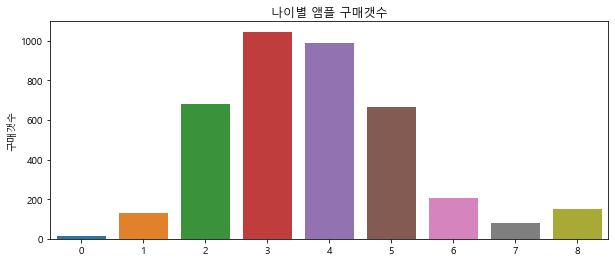

In [31]:
# 나이별 앰플 구매 갯수
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=mat2.index, y="구매갯수", data=mat2)
plt.title("나이별 앰플 구매갯수")

### 피부타입에 따른 앰플 구매갯수

#### 피부타입 : 건조함

In [132]:
mat3 = mat.groupby("건조함").sum()
mat3 = mat3.rename(index={0:"없음", 1:"있음"})
mat3

,나이,성별,건성,지성,모름,과잉피지,여드름,좁쌀,홍조&예민,복합성,기미&잡티,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플
건조함,,,,,,,,,,,,,,,,
없음,6382.0,159,165,283,97,635,628,752,650,1199,706,86,5,270,56,1327
있음,8579.0,129,950,66,108,552,538,845,872,1104,997,127,11,445,53,1592


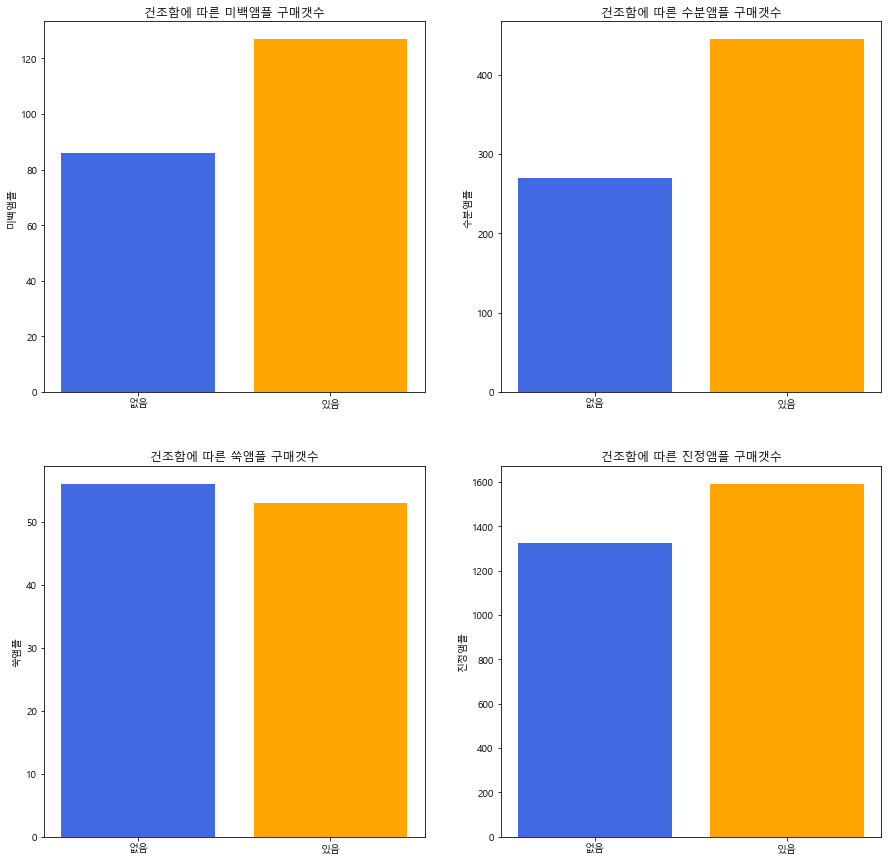

In [122]:
plt.figure(figsize=(15, 15))
colors=["royalblue", "orange"]
plt.subplot(221)
plt.title("건조함에 따른 미백앰플 구매갯수")
plt.ylabel("미백앰플")
plt.bar(mat3.index,mat3["미백앰플"],color=colors)
plt.subplot(222)
plt.title("건조함에 따른 수분앰플 구매갯수")
plt.ylabel("수분앰플")
plt.bar(mat3.index,mat3["수분앰플"], color=colors)
plt.subplot(223)
plt.title("건조함에 따른 쑥앰플 구매갯수")
plt.ylabel("쑥앰플")
plt.bar(mat3.index,mat3["쑥앰플"], color=colors)
plt.subplot(224)
plt.title("건조함에 따른 진정앰플 구매갯수")
plt.ylabel("진정앰플")
plt.bar(mat3.index,mat3["진정앰플"], color=colors)

plt.show()

#### 피부타입 : 과잉피지

In [124]:
mat4 = mat.groupby("과잉피지").sum()
mat4 = mat4.rename(index={0:"없음", 1:"있음"})
mat4

,나이,성별,건성,지성,모름,건조함,여드름,좁쌀,홍조&예민,복합성,기미&잡티,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플
과잉피지,,,,,,,,,,,,,,,,
없음,10887.0,187,1018,114,152,1676,595,960,1028,1501,1232,185,13,553,70,1964
있음,4074.0,101,97,235,53,552,571,637,494,802,471,28,3,162,39,955


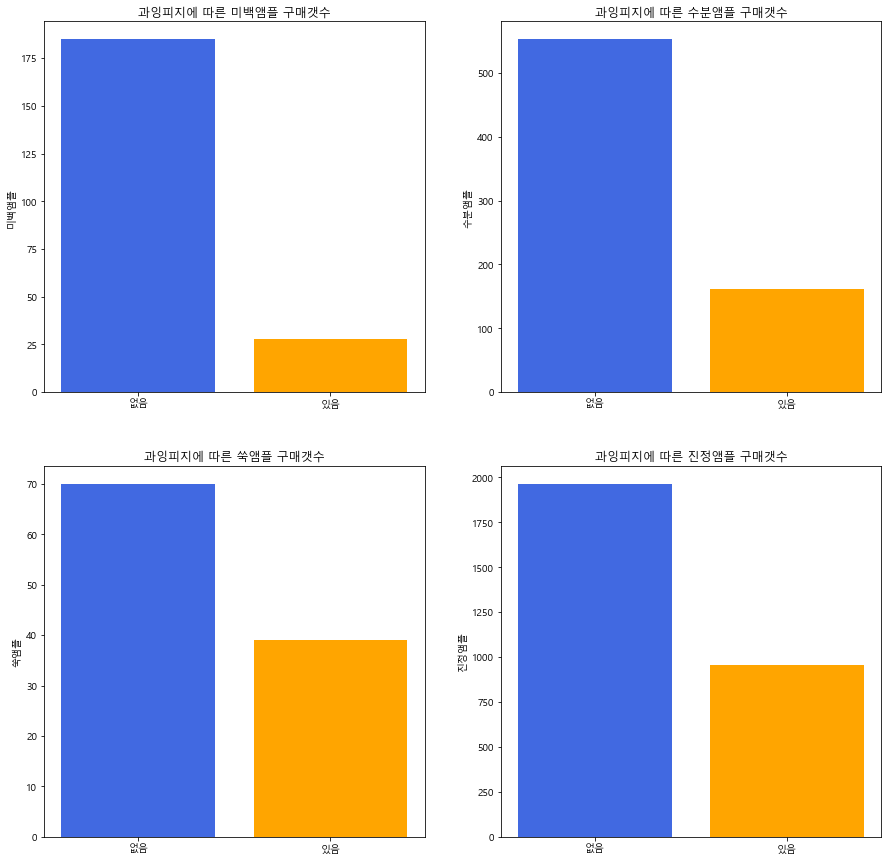

In [126]:
plt.figure(figsize=(15, 15))
colors=["royalblue", "orange"]
plt.subplot(221)
plt.title("과잉피지에 따른 미백앰플 구매갯수")
plt.ylabel("미백앰플")
plt.bar(mat4.index,mat4["미백앰플"],color=colors)
plt.subplot(222)
plt.title("과잉피지에 따른 수분앰플 구매갯수")
plt.ylabel("수분앰플")
plt.bar(mat4.index,mat4["수분앰플"], color=colors)
plt.subplot(223)
plt.title("과잉피지에 따른 쑥앰플 구매갯수")
plt.ylabel("쑥앰플")
plt.bar(mat4.index,mat4["쑥앰플"], color=colors)
plt.subplot(224)
plt.title("과잉피지에 따른 진정앰플 구매갯수")
plt.ylabel("진정앰플")
plt.bar(mat4.index,mat4["진정앰플"], color=colors)

plt.show()

#### 피부타입 : 여드름

In [127]:
mat5 = mat.groupby("여드름").sum()
mat5 = mat5.rename(index={0:"없음", 1:"있음"})
mat5

,나이,성별,건성,지성,모름,건조함,과잉피지,좁쌀,홍조&예민,복합성,기미&잡티,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플
여드름,,,,,,,,,,,,,,,,
없음,11302.0,189,980,156,137,1690,616,946,1013,1533,1319,196,9,525,64,2012
있음,3659.0,99,135,193,68,538,571,651,509,770,384,17,7,190,45,907


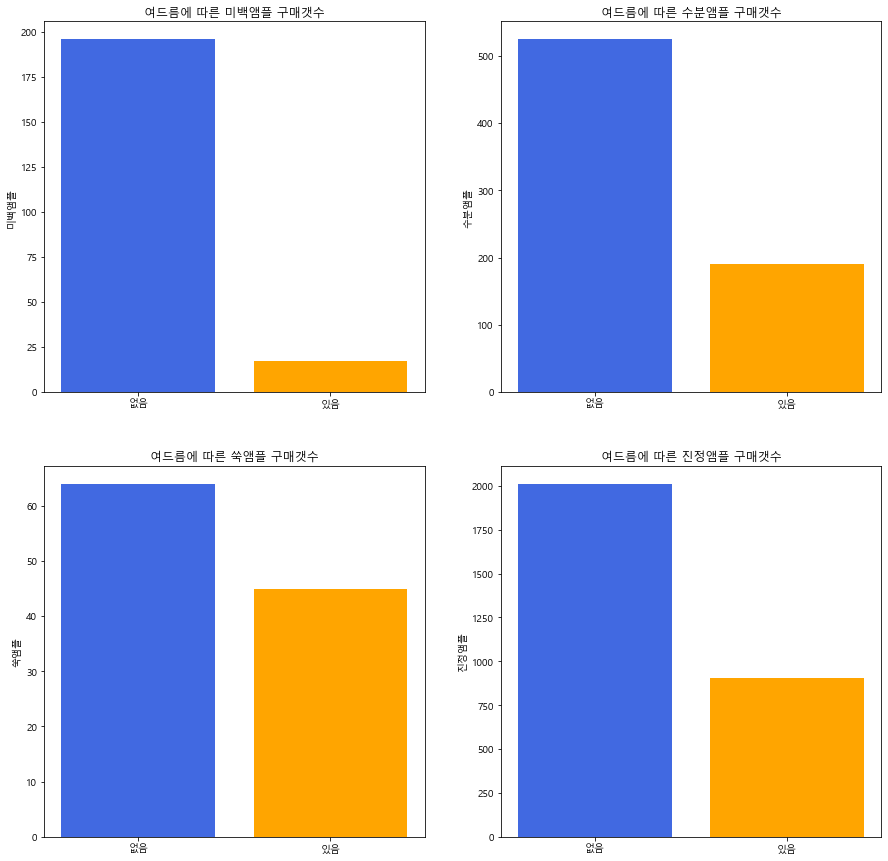

In [128]:
plt.figure(figsize=(15, 15))
colors=["royalblue", "orange"]
plt.subplot(221)
plt.title("여드름에 따른 미백앰플 구매갯수")
plt.ylabel("미백앰플")
plt.bar(mat5.index,mat5["미백앰플"],color=colors)
plt.subplot(222)
plt.title("여드름에 따른 수분앰플 구매갯수")
plt.ylabel("수분앰플")
plt.bar(mat5.index,mat5["수분앰플"], color=colors)
plt.subplot(223)
plt.title("여드름에 따른 쑥앰플 구매갯수")
plt.ylabel("쑥앰플")
plt.bar(mat5.index,mat5["쑥앰플"], color=colors)
plt.subplot(224)
plt.title("여드름에 따른 진정앰플 구매갯수")
plt.ylabel("진정앰플")
plt.bar(mat5.index,mat5["진정앰플"], color=colors)

plt.show()

#### 피부타입 : 좁쌀여드름

In [129]:
mat6 = mat.groupby("좁쌀").sum()
mat6 = mat6.rename(index={0:"없음", 1:"있음"})
mat6

,나이,성별,건성,지성,모름,건조함,과잉피지,여드름,홍조&예민,복합성,기미&잡티,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플
좁쌀,,,,,,,,,,,,,,,,
없음,9672.0,203,797,181,114,1383,550,515,842,1283,1108,162,8,468,58,1679
있음,5289.0,85,318,168,91,845,637,651,680,1020,595,51,8,247,51,1240


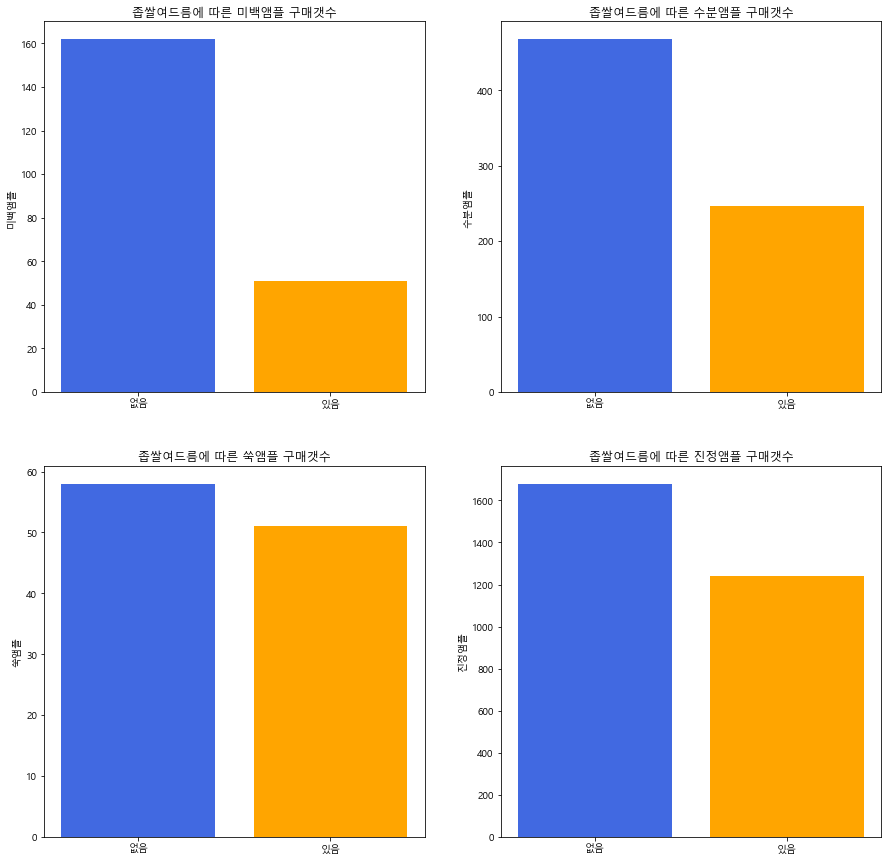

In [130]:
plt.figure(figsize=(15, 15))
colors=["royalblue", "orange"]
plt.subplot(221)
plt.title("좁쌀여드름에 따른 미백앰플 구매갯수")
plt.ylabel("미백앰플")
plt.bar(mat6.index,mat6["미백앰플"],color=colors)
plt.subplot(222)
plt.title("좁쌀여드름에 따른 수분앰플 구매갯수")
plt.ylabel("수분앰플")
plt.bar(mat6.index,mat6["수분앰플"], color=colors)
plt.subplot(223)
plt.title("좁쌀여드름에 따른 쑥앰플 구매갯수")
plt.ylabel("쑥앰플")
plt.bar(mat6.index,mat6["쑥앰플"], color=colors)
plt.subplot(224)
plt.title("좁쌀여드름에 따른 진정앰플 구매갯수")
plt.ylabel("진정앰플")
plt.bar(mat6.index,mat6["진정앰플"], color=colors)

plt.show()

#### 피부타입 : 홍조 & 예민

In [133]:
mat7 = mat.groupby("홍조&예민").sum()
mat7 = mat7.rename(index={0:"없음", 1:"있음"})
mat7

,나이,성별,건성,지성,모름,건조함,과잉피지,여드름,좁쌀,복합성,기미&잡티,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플
홍조&예민,,,,,,,,,,,,,,,,
없음,9492.0,216,747,226,130,1356,693,657,917,1347,1102,159,14,452,66,1759
있음,5469.0,72,368,123,75,872,494,509,680,956,601,54,2,263,43,1160


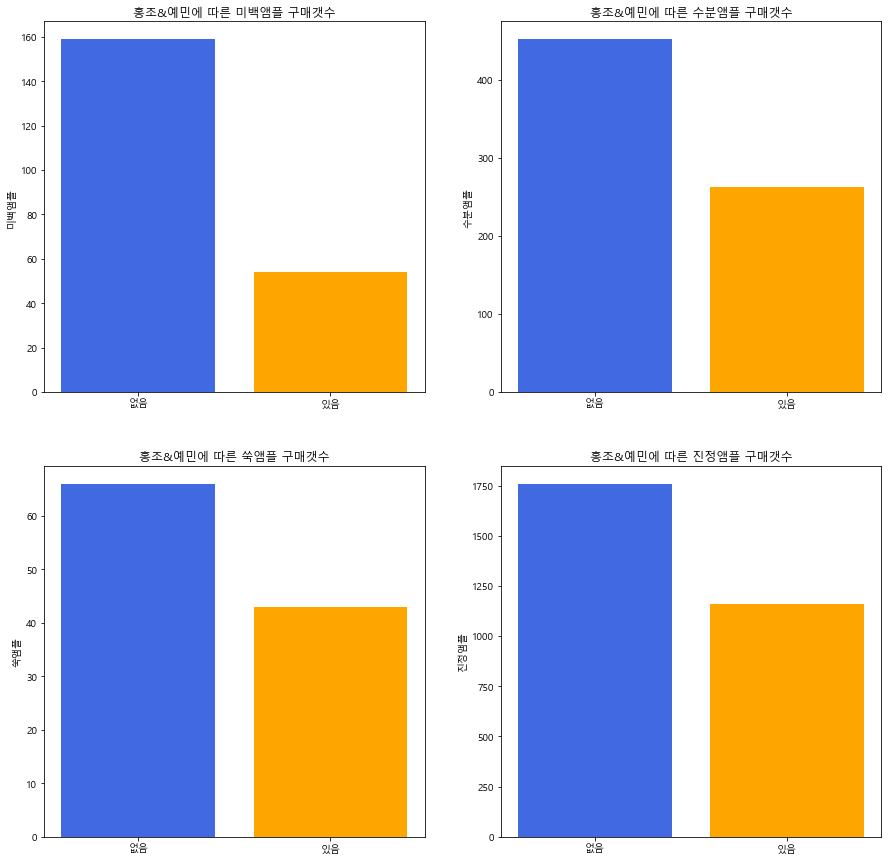

In [134]:
plt.figure(figsize=(15, 15))
colors=["royalblue", "orange"]
plt.subplot(221)
plt.title("홍조&예민에 따른 미백앰플 구매갯수")
plt.ylabel("미백앰플")
plt.bar(mat7.index,mat7["미백앰플"],color=colors)
plt.subplot(222)
plt.title("홍조&예민에 따른 수분앰플 구매갯수")
plt.ylabel("수분앰플")
plt.bar(mat7.index,mat7["수분앰플"], color=colors)
plt.subplot(223)
plt.title("홍조&예민에 따른 쑥앰플 구매갯수")
plt.ylabel("쑥앰플")
plt.bar(mat7.index,mat7["쑥앰플"], color=colors)
plt.subplot(224)
plt.title("홍조&예민에 따른 진정앰플 구매갯수")
plt.ylabel("진정앰플")
plt.bar(mat7.index,mat7["진정앰플"], color=colors)

plt.show()

#### 피부타입 :  기미 & 잡티

In [136]:
mat8 = mat.groupby("기미&잡티").sum()
mat8 = mat8.rename(index={0:"없음", 1:"있음"})
mat8

,나이,성별,건성,지성,모름,건조함,과잉피지,여드름,좁쌀,홍조&예민,복합성,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플
기미&잡티,,,,,,,,,,,,,,,,
없음,7977.0,220,621,250,116,1231,716,782,1002,921,1282,86,12,410,71,1690
있음,6984.0,68,494,99,89,997,471,384,595,601,1021,127,4,305,38,1229


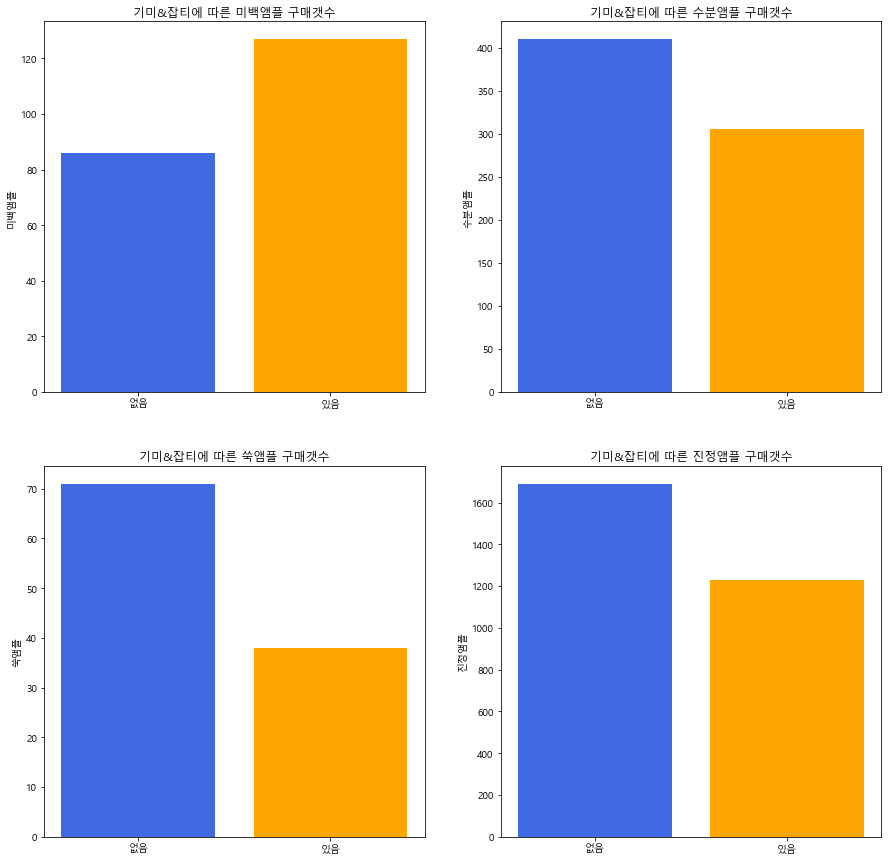

In [137]:
plt.figure(figsize=(15, 15))
colors=["royalblue", "orange"]
plt.subplot(221)
plt.title("기미&잡티에 따른 미백앰플 구매갯수")
plt.ylabel("미백앰플")
plt.bar(mat8.index,mat8["미백앰플"],color=colors)
plt.subplot(222)
plt.title("기미&잡티에 따른 수분앰플 구매갯수")
plt.ylabel("수분앰플")
plt.bar(mat8.index,mat8["수분앰플"], color=colors)
plt.subplot(223)
plt.title("기미&잡티에 따른 쑥앰플 구매갯수")
plt.ylabel("쑥앰플")
plt.bar(mat8.index,mat8["쑥앰플"], color=colors)
plt.subplot(224)
plt.title("기미&잡티에 따른 진정앰플 구매갯수")
plt.ylabel("진정앰플")
plt.bar(mat8.index,mat8["진정앰플"], color=colors)

plt.show()